In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from main_backtest import run_full_backtest
import statsmodels.api as sm
from cal_backtest_stats import *

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [12]:
params = {
    'start_year': 2010, 
    'end_year': 2024, 
    'top_corr_pairs': 20,
    'num_pairs': 15,
    'trigger_std': 1.96,
    'stoploss_std': 3.0
}
sr_LT_pct_ret = run_full_backtest(**params)
sr_nav = (100*(1+sr_LT_pct_ret).cumprod())

/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()


<AxesSubplot:>

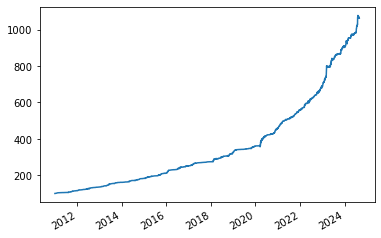

In [13]:
sr_nav.plot()

In [14]:
generate_stats_table(sr_nav.to_frame())

,0
Annualised Return,0.188858
Annualised Volatility,0.043354
Sharpe Ratio,4.356225
Max Drawdown,-0.025789
Max Drawdown/Vol Ratio,-0.594848
Sortino Ratio,7.591855
% +ve month,0.969512


In [18]:
from itertools import product
# run multiple parameters to test parameter sensitivity 
params_config = {
                'num_pairs': [2, 5, 10],   # number of pairs selected to test
                'trigger_std': [1.96], # entry position standard deviation
                'stoploss_std': [2.5, 3.0]     # stop loss standard deviation
                }  

# 4 * 3 * 2 = 24 combinations to test
all_params = [dict(zip(params_config, val))\
              for val in product(*params_config.values())]
records_dict = {}
for i, para in enumerate(all_params):
    sr_LT_pct_ret = run_full_backtest(**para)
    sr_nav = (100*(1+sr_LT_pct_ret).cumprod())
    stats_dict = cal_backtest_stats(sr_LT_pct_ret)
    para.update(stats_dict)
    records_dict[i] = para.copy()
df_all_records = pd.DataFrame(data=records_dict).T


/Users/shenyifan/Documents/equities_mean_reversion/main_backtest.py:51: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sr_LT_pct_ret = pd.Series()
